In [2]:
#LOADING THE DATASET IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [3]:
#LOADING DATASET
dataset = pd.read_csv('Botnet Dataset.csv')
dataset.head()


,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,SinkHoleMessage,1.310000e+17,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
3,SinkHoleMessage,1.310000e+17,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,SinkHoleMessage,1.310000e+17,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [4]:
dataset.tail() 

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
7994,SinkHoleMessage,1.310000e+17,B106-Rebhip,118.100.139.21,53816,AS4788,204.95.99.142,86,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
7995,SinkHoleMessage,1.310000e+17,B106-Rebhip,118.100.139.21,53816,AS4788,204.95.99.142,86,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
7996,SinkHoleMessage,1.310000e+17,B106-Rebhip,118.100.139.21,53816,AS4788,204.95.99.142,86,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
7997,SinkHoleMessage,1.310000e+17,B106-Rebhip,118.100.139.21,53816,AS4788,204.95.99.142,86,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
7998,SinkHoleMessage,1.310000e+17,B106-Rebhip,118.100.139.21,53816,AS4788,204.95.99.142,86,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [5]:
# DATASET CLEANING 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SourcedFrom          7999 non-null   object 
 1   FileTimeUtc          7999 non-null   float64
 2   Botnet               7999 non-null   object 
 3   SourceIp             7999 non-null   object 
 4   SourcePort           7999 non-null   int64  
 5   SourceIpAsnNr        7999 non-null   object 
 6   TargetIp             7999 non-null   object 
 7   TargetPort           7999 non-null   int64  
 8   Payload              0 non-null      float64
 9   SourceIpCountryCode  7999 non-null   object 
 10  SourceIpRegion       7621 non-null   float64
 11  SourceIpCity         7621 non-null   object 
 12  SourceIpPostalCode   4 non-null      float64
 13  SourceIpLatitude     7999 non-null   float64
 14  SourceIpLongitude    7999 non-null   float64
 15  SourceIpMetroCode    7999 non-null   i

<Axes: >

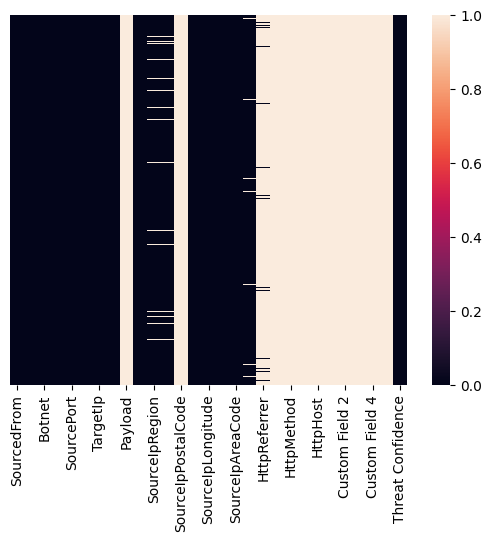

In [6]:
# PLOTTING HEATMAP FOR NULL DATA
sns.heatmap(dataset.isnull(),yticklabels=False)


In [7]:
# PRINTING NUMBER OF NULL VALUES
missing_values_totalcount = dataset.isnull().sum()
missing_values_totalcount

SourcedFrom               0
FileTimeUtc               0
Botnet                    0
SourceIp                  0
SourcePort                0
SourceIpAsnNr             0
TargetIp                  0
TargetPort                0
Payload                7999
SourceIpCountryCode       0
SourceIpRegion          378
SourceIpCity            378
SourceIpPostalCode     7995
SourceIpLatitude          0
SourceIpLongitude         0
SourceIpMetroCode         0
SourceIpAreaCode          0
HttpRequest             140
HttpReferrer           7678
HttpUserAgent          7993
HttpMethod             7996
HttpVersion            7996
HttpHost               7996
Custom Field 1         7999
Custom Field 2         7999
Custom Field 3         7999
Custom Field 4         7999
Custom Field 5         7999
Threat Confidence         0
dtype: int64

In [8]:
# DROPPING NOT REQUIRED COLUMNS
dataset = dataset.drop(['Payload','SourceIpPostalCode','HttpReferrer','HttpUserAgent','HttpUserAgent',
        'HttpMethod','HttpVersion','HttpHost','Custom Field 1','Custom Field 2',
        'Custom Field 3','Custom Field 4','Custom Field 5','SourceIpCountryCode'],axis=1)
dataset.head()


,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpRegion,SourceIpCity,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,HttpRequest,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,12.0,Kajang,2.9927,101.7909,0,0,POST /is-ready HTTP/1.1,High
1,SinkHoleMessage,1.310000e+17,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,3.0,Kota Bharu,6.1333,102.2386,0,0,POST /is-ready HTTP/1.1,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,6.0,Kuantan,3.8077,103.3260,0,0,POST /is-ready HTTP/1.1,High
3,SinkHoleMessage,1.310000e+17,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,12.0,Petaling Jaya,3.0833,101.6500,0,0,280,Low
4,SinkHoleMessage,1.310000e+17,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /is-ready HTTP/1.1,High


In [9]:
missing_values_totalcount = dataset.isnull().sum()
missing_values_totalcount


SourcedFrom            0
FileTimeUtc            0
Botnet                 0
SourceIp               0
SourcePort             0
SourceIpAsnNr          0
TargetIp               0
TargetPort             0
SourceIpRegion       378
SourceIpCity         378
SourceIpLatitude       0
SourceIpLongitude      0
SourceIpMetroCode      0
SourceIpAreaCode       0
HttpRequest          140
Threat Confidence      0
dtype: int64

In [10]:
# UNIQUE VALUES
dataset['SourceIpCity'].unique()

array(['Kajang', 'Kota Bharu', 'Kuantan', 'Petaling Jaya', 'Kuala Lumpur',
       'Penang', 'Kota Kinabalu', 'Melaka', 'Kampar', 'Selangor',
       'Bayan Lepas', 'Puchong', 'Nibong Tebal', 'Ayer Keroh',
       'Ulu Tiram', 'Ipoh', 'Johor Bahru', 'Seri Kembangan', 'Klang', nan,
       'Kuching', 'Segamat', 'Kuala Terengganu', 'Kubang Kerian',
       'Skudai', 'Taiping', 'Rawang', 'Batu Caves', 'Kluang', 'Shah Alam',
       'Kangar', 'Marang', 'Kemaman', 'Seremban', 'Ampang', 'Cheras',
       'Damansara', 'Putrajaya', 'Kulai', 'Bukit Mertajam', 'Batu Gajah',
       'Johor', 'Alor Setar', 'Yong Peng', 'Salak Selatan',
       'Sungai Petani', 'Mentakab', 'Bachok', 'Teluk Intan',
       'Bagan Serai', 'Chemor', 'Butterworth', 'Batu Pahat', 'Sibu',
       'Tamparuli', 'Kulim', 'Pahang', 'Bintulu', 'Tebrau',
       'Padang Serai', 'Muar', 'Pusing', 'Kepong', 'Pantai', 'Prai',
       'Kuala Kangsar', 'Pinang', 'Jelutong', 'Johore Bharu', 'Kota',
       'Kuala Lipis', 'Balik Pulau', 'Pasir Gud

In [11]:
dataset['SourceIpCity']=dataset['SourceIpCity'].fillna('not available')
dataset['SourceIpCity'].unique()


array(['Kajang', 'Kota Bharu', 'Kuantan', 'Petaling Jaya', 'Kuala Lumpur',
       'Penang', 'Kota Kinabalu', 'Melaka', 'Kampar', 'Selangor',
       'Bayan Lepas', 'Puchong', 'Nibong Tebal', 'Ayer Keroh',
       'Ulu Tiram', 'Ipoh', 'Johor Bahru', 'Seri Kembangan', 'Klang',
       'not available', 'Kuching', 'Segamat', 'Kuala Terengganu',
       'Kubang Kerian', 'Skudai', 'Taiping', 'Rawang', 'Batu Caves',
       'Kluang', 'Shah Alam', 'Kangar', 'Marang', 'Kemaman', 'Seremban',
       'Ampang', 'Cheras', 'Damansara', 'Putrajaya', 'Kulai',
       'Bukit Mertajam', 'Batu Gajah', 'Johor', 'Alor Setar', 'Yong Peng',
       'Salak Selatan', 'Sungai Petani', 'Mentakab', 'Bachok',
       'Teluk Intan', 'Bagan Serai', 'Chemor', 'Butterworth',
       'Batu Pahat', 'Sibu', 'Tamparuli', 'Kulim', 'Pahang', 'Bintulu',
       'Tebrau', 'Padang Serai', 'Muar', 'Pusing', 'Kepong', 'Pantai',
       'Prai', 'Kuala Kangsar', 'Pinang', 'Jelutong', 'Johore Bharu',
       'Kota', 'Kuala Lipis', 'Balik Pulau'

In [12]:
# Legit and Non-Legit
requests = []
for i in range(dataset.shape[0]):
    try:
        if dataset.HttpRequest.iloc[i].lower().find('post') >= 0:
            requests.append('LEGIT')
        else:
            requests.append('NOT')
    except:
        requests.append('NOT')
        
dataset['PostLegit'] = requests
dataset.PostLegit.head()


0    LEGIT
1    LEGIT
2    LEGIT
3      NOT
4    LEGIT
Name: PostLegit, dtype: object

In [13]:
# SIMPLIFYING DATASET
first_source, first_num = [], []
for i in range(dataset.shape[0]):
    first_source.append(dataset['SourceIp'].iloc[i].split('.')[0]+'.X.X.X')
    first_num.append(int(dataset['SourceIp'].iloc[i].split('.')[0]))
dataset['FirstSource'] = first_source
dataset['FirstNum'] = first_num
dataset['FirstSource'].head()


0    219.X.X.X
1    115.X.X.X
2     14.X.X.X
3     60.X.X.X
4    113.X.X.X
Name: FirstSource, dtype: object

In [14]:
#TRANSFORMING OUTPUT COLUMN
from sklearn.preprocessing import LabelEncoder
labels=[]
for i in range(dataset.shape[0]):
    if dataset['Threat Confidence'].iloc[i]=='High':
        labels.append(1)
    else:
        labels.append(0)
dataset['threat_int']=labels
dataset['threat_int'].head()

0    1
1    1
2    1
3    0
4    1
Name: threat_int, dtype: int64

In [15]:
#UNDERSTANDING THE DATA
dataset.describe()



,FileTimeUtc,SourcePort,TargetPort,SourceIpRegion,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,FirstNum,threat_int
count,7.999000e+03,7999.000000,7999.000000,7621.000000,7999.000000,7999.000000,7999.0,7999.0,7999.000000,7999.000000
mean,1.310000e+17,36095.886236,1624.576572,9.906049,3.507096,102.721701,0.0,0.0,134.317915,0.760220
std,0.000000e+00,22053.655924,2129.280844,4.374148,1.238240,3.372854,0.0,0.0,62.409527,0.426976
min,1.310000e+17,1044.000000,4.000000,1.000000,1.462000,100.198600,0.0,0.0,1.000000,0.000000
25%,1.310000e+17,12684.000000,88.000000,7.000000,3.016700,101.616700,0.0,0.0,103.000000,1.000000
50%,1.310000e+17,49317.000000,991.000000,12.000000,3.166700,101.700000,0.0,0.0,123.000000,1.000000
75%,1.310000e+17,54613.000000,1998.000000,14.000000,4.469200,102.240500,0.0,0.0,183.000000,1.000000
max,1.310000e+17,65491.000000,14725.000000,17.000000,6.441400,118.327000,0.0,0.0,219.000000,1.000000


In [16]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SourcedFrom        7999 non-null   object 
 1   FileTimeUtc        7999 non-null   float64
 2   Botnet             7999 non-null   object 
 3   SourceIp           7999 non-null   object 
 4   SourcePort         7999 non-null   int64  
 5   SourceIpAsnNr      7999 non-null   object 
 6   TargetIp           7999 non-null   object 
 7   TargetPort         7999 non-null   int64  
 8   SourceIpRegion     7621 non-null   float64
 9   SourceIpCity       7999 non-null   object 
 10  SourceIpLatitude   7999 non-null   float64
 11  SourceIpLongitude  7999 non-null   float64
 12  SourceIpMetroCode  7999 non-null   int64  
 13  SourceIpAreaCode   7999 non-null   int64  
 14  HttpRequest        7859 non-null   object 
 15  Threat Confidence  7999 non-null   object 
 16  PostLegit          7999 

In [17]:
dataset.shape

(7999, 20)

In [18]:
#COUNT OF THREAT CONFIDENCE
dataset['Threat Confidence'].value_counts()


High    6081
Low     1918
Name: Threat Confidence, dtype: int64

In [19]:
dataset.head()

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpRegion,SourceIpCity,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,HttpRequest,Threat Confidence,PostLegit,FirstSource,FirstNum,threat_int
0,SinkHoleMessage,1.310000e+17,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,12.0,Kajang,2.9927,101.7909,0,0,POST /is-ready HTTP/1.1,High,LEGIT,219.X.X.X,219,1
1,SinkHoleMessage,1.310000e+17,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,3.0,Kota Bharu,6.1333,102.2386,0,0,POST /is-ready HTTP/1.1,High,LEGIT,115.X.X.X,115,1
2,SinkHoleMessage,1.310000e+17,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,6.0,Kuantan,3.8077,103.3260,0,0,POST /is-ready HTTP/1.1,High,LEGIT,14.X.X.X,14,1
3,SinkHoleMessage,1.310000e+17,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,12.0,Petaling Jaya,3.0833,101.6500,0,0,280,Low,NOT,60.X.X.X,60,0
4,SinkHoleMessage,1.310000e+17,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /is-ready HTTP/1.1,High,LEGIT,113.X.X.X,113,1


<Axes: xlabel='SourceIpAreaCode', ylabel='count'>

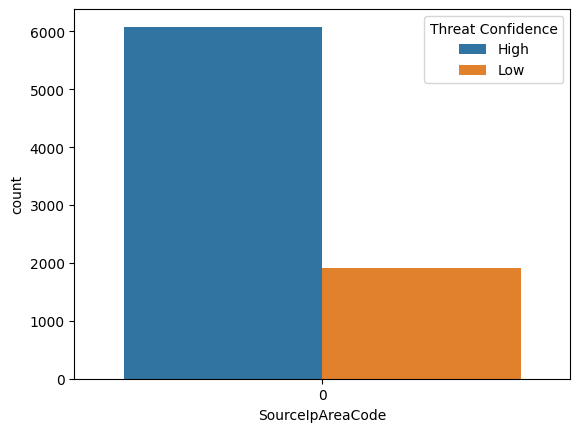

In [20]:
#Study the effect of features on Threat Confidence
#Effect of Source Ip Area Code  on Threat Confidence
sns.countplot(data=dataset,x='SourceIpAreaCode',hue='Threat Confidence')


<Axes: xlabel='SourceIpAreaCode', ylabel='count'>

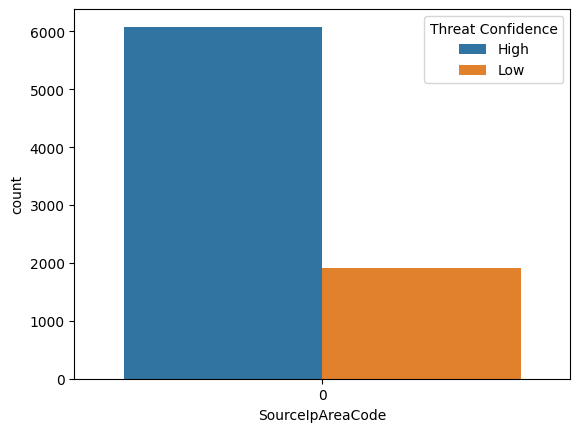

In [21]:
#Effect of Source Ip Metro Code on Threat Confidence
sns.countplot(data=dataset,x='SourceIpAreaCode',hue='Threat Confidence')


<Axes: xlabel='SourceIpLongitude', ylabel='count'>

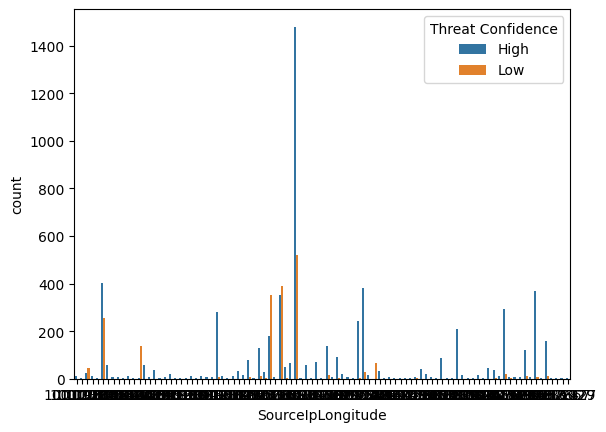

In [22]:
#Effect of Source Ip Longitude on Threat Confidence
sns.countplot(data=dataset,x='SourceIpLongitude',hue='Threat Confidence')


<Axes: xlabel='SourceIpLatitude', ylabel='count'>

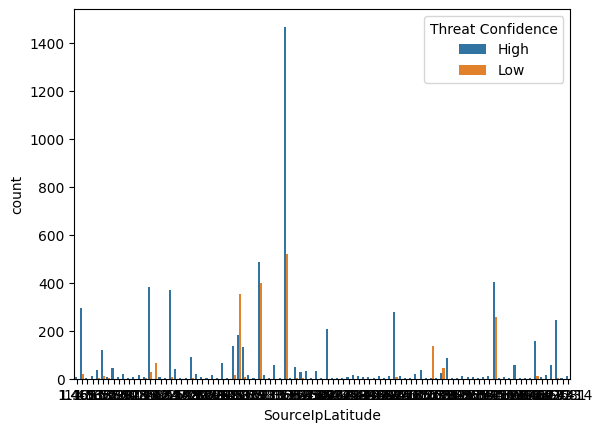

In [23]:
#Effect of Source Ip Latitude on Threat Confidence
sns.countplot(data=dataset,x='SourceIpLatitude',hue='Threat Confidence')


<Axes: xlabel='SourceIpRegion', ylabel='count'>

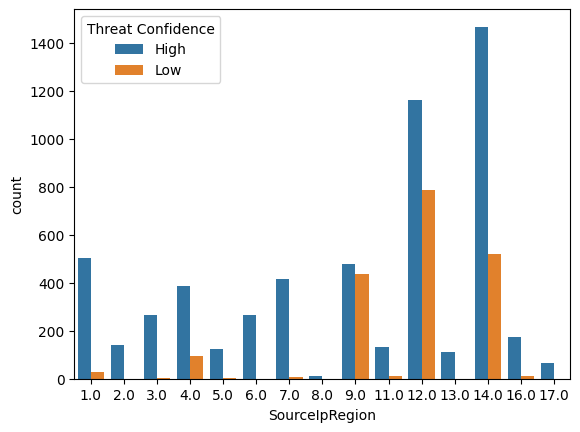

In [24]:
#Effect of Source Ip Region on Threat Confidence
sns.countplot(data=dataset,x='SourceIpRegion',hue='Threat Confidence')


<Axes: xlabel='TargetPort', ylabel='count'>

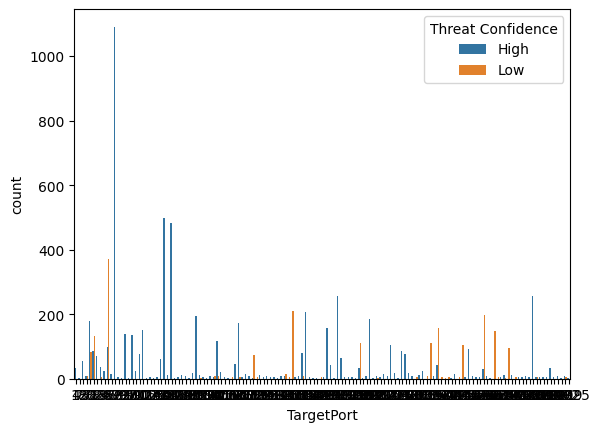

In [25]:
#Effect of Target Port on Threat Confidence
sns.countplot(data=dataset,x='TargetPort',hue='Threat Confidence')


<Axes: xlabel='TargetIp', ylabel='count'>

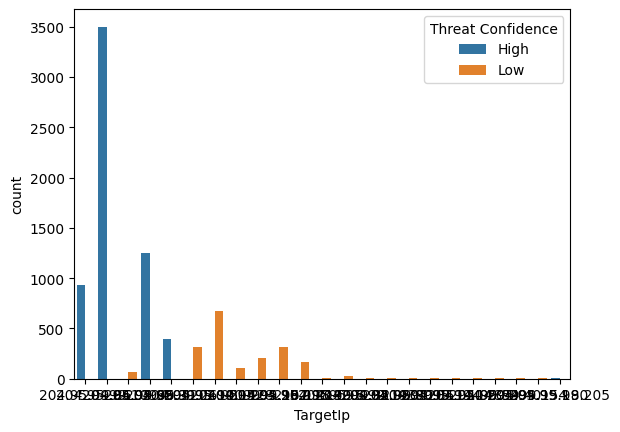

In [26]:
#Effect of Target Ip on Threat Confidence
sns.countplot(data=dataset,x='TargetIp',hue='Threat Confidence')


<Axes: xlabel='SourceIpAsnNr', ylabel='count'>

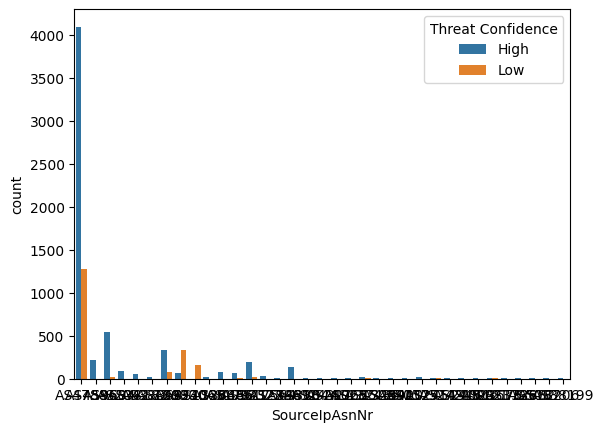

In [27]:
#Effect of Target Ip on Threat Confidence
sns.countplot(data=dataset,x='SourceIpAsnNr',hue='Threat Confidence')


<Axes: xlabel='SourcePort', ylabel='count'>

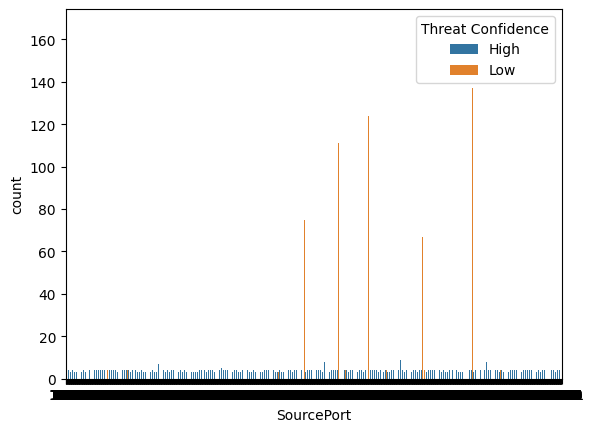

In [50]:
#Effect of Source Port on Threat Confidence
sns.countplot(data=dataset,x='SourcePort',hue='Threat Confidence')



In [47]:
#DATA PREPROCESSING
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SourcedFrom        7999 non-null   object 
 1   FileTimeUtc        7999 non-null   float64
 2   Botnet             7999 non-null   object 
 3   SourceIp           7999 non-null   object 
 4   SourcePort         7999 non-null   int64  
 5   SourceIpAsnNr      7999 non-null   object 
 6   TargetIp           7999 non-null   object 
 7   TargetPort         7999 non-null   int64  
 8   SourceIpRegion     7621 non-null   float64
 9   SourceIpCity       7999 non-null   object 
 10  SourceIpLatitude   7999 non-null   float64
 11  SourceIpLongitude  7999 non-null   float64
 12  SourceIpMetroCode  7999 non-null   int64  
 13  SourceIpAreaCode   7999 non-null   int64  
 14  HttpRequest        7859 non-null   object 
 15  Threat Confidence  7999 non-null   object 
 16  PostLegit          7999 

In [48]:
# Preparing Dataset
X = dataset[['Botnet','FirstSource','SourceIpCity','PostLegit','TargetPort','TargetIp','SourceIpAsnNr','SourcePort']]
X.head()


,Botnet,FirstSource,SourceIpCity,PostLegit,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,B106-Jenxcus,219.X.X.X,Kajang,LEGIT,4442,204.95.99.86,AS4788,1044
1,B106-MULTI,115.X.X.X,Kota Bharu,LEGIT,88,204.95.99.109,AS4788,57260
2,B106-MULTI,14.X.X.X,Kuantan,LEGIT,81,204.95.99.109,AS45960,58859
3,B106-Fynloski,60.X.X.X,Petaling Jaya,NOT,5552,204.95.99.66,AS4788,53586
4,B106-CB,113.X.X.X,Kuala Lumpur,LEGIT,288,204.95.99.31,AS9534,12277


In [49]:
#Sum of allnull values
X.isnull().sum()

Botnet           0
FirstSource      0
SourceIpCity     0
PostLegit        0
TargetPort       0
TargetIp         0
SourceIpAsnNr    0
SourcePort       0
dtype: int64

In [53]:
#TRANSFORMING DATASET
X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']]=X[['Botnet','FirstSource','PostLegit',
'SourceIpCity','TargetIp','SourceIpAsnNr']].apply(LabelEncoder().fit_transform)

#FINAL DATASET
X.head()


C:\Users\aslam\AppData\Local\Temp\ipykernel_14540\1305775980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']]=X[['Botnet','FirstSource','PostLegit',


,Botnet,FirstSource,SourceIpCity,PostLegit,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,10,28,37,0,4442,22,29,1044
1,11,6,46,0,88,1,29,57260
2,11,15,53,0,81,1,28,58859
3,6,33,74,1,5552,18,29,53586
4,2,5,51,0,288,13,32,12277


In [52]:
#OUTPUT COLUMN
Y = dataset['threat_int']
Y.head()


0    1
1    1
2    1
3    0
4    1
Name: threat_int, dtype: int64

In [54]:
#SPLITTING INTO TRAINING AND TESTING DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()


(6399, 8)
(1600, 8)
(6399,)
(1600,)


In [55]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
#Scales the data into variance
#can same mean and variance
X_train[:,7:9] = sc.fit_transform(X_train[:,7:9]) 
X_test[:,7:9] = sc.transform(X_test[:,7:9]) 
print("X_train = ",X_train)
print("Y_train = ",Y_train)
print("X_test = ",X_test)
print("Y_test = ",Y_test)



X_train =  [[14 33 65 ...  3 29  0]
 [ 2 28  0 ... 13 29  0]
 [ 2 24 56 ... 13 29 -1]
 ...
 [ 2 25 46 ... 13 29 -1]
 [11 19 78 ...  1 29  0]
 [11 15 37 ...  1 28  0]]
Y_train =  [0 1 1 ... 1 1 1]
X_test =  [[  2  28   0 ...  13  29   0]
 [ 11   5  51 ...   1  32   0]
 [ 10  14 102 ...  22  29   0]
 ...
 [  3  19  51 ...  14  29   0]
 [  1   0  62 ...  12  29  -1]
 [ 13  26  51 ...   2  34   0]]
Y_test =  [1 1 1 ... 0 1 0]


In [56]:
#TRAINING THE MODEL ON THE TRAINING SET LOGISTIC REGRESSION

In [57]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) 
# Maximum number of iterations used by the solver to converge
lr.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [58]:
#PREDICTING VALUES
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
lr_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))



[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]


C:\Users\aslam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 248  118]
 [ 173 1061]]


MODEL ACCURACY :  81.8125


In [60]:
#CLASSIFICATION REPORT
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.59      0.68      0.63       366
           1       0.90      0.86      0.88      1234

    accuracy                           0.82      1600
   macro avg       0.74      0.77      0.75      1600
weighted avg       0.83      0.82      0.82      1600



In [61]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)


GaussianNB()

In [62]:
#PREDICTING VALUES
Y_pred = nb.predict(X_test)
nb_score = accuracy_score(Y_test,lr.predict(X_test))

print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [63]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 226  140]
 [ 220 1014]]


MODEL ACCURACY :  77.5


In [64]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.51      0.62      0.56       366
           1       0.88      0.82      0.85      1234

    accuracy                           0.78      1600
   macro avg       0.69      0.72      0.70      1600
weighted avg       0.79      0.78      0.78      1600



In [65]:
# K NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=85,metric='minkowski',p=2)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=85)

In [66]:
#PREDICTING VALUES

Y_pred = knn.predict(X_test)
knn_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [67]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 346   20]
 [  92 1142]]


MODEL ACCURACY :  93.0


In [68]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.79      0.95      0.86       366
           1       0.98      0.93      0.95      1234

    accuracy                           0.93      1600
   macro avg       0.89      0.94      0.91      1600
weighted avg       0.94      0.93      0.93      1600



In [71]:
#SVM MODEL
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',random_state=0) 
# it will produce the same splitting datasets.
svm.fit(X_train, Y_train)


SVC(random_state=0)

In [72]:
#PREDICTING VALUES
Y_pred = svm.predict(X_test)
svm_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [73]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 161  205]
 [  56 1178]]


MODEL ACCURACY :  83.6875


In [74]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.74      0.44      0.55       366
           1       0.85      0.95      0.90      1234

    accuracy                           0.84      1600
   macro avg       0.80      0.70      0.73      1600
weighted avg       0.83      0.84      0.82      1600



In [75]:
#PERCEPTRON MODEL
from sklearn.linear_model import Perceptron
percept = Perceptron(tol=1e-3, random_state=0)
percept.fit(X_train, Y_train)


Perceptron()

In [76]:
#PREDICTING VALUES

Y_pred = percept.predict(X_test)
percept_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), 
Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [77]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 136  230]
 [ 200 1034]]


MODEL ACCURACY :  73.125


In [78]:
#CLASSIFICATION MODEL
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.40      0.37      0.39       366
           1       0.82      0.84      0.83      1234

    accuracy                           0.73      1600
   macro avg       0.61      0.60      0.61      1600
weighted avg       0.72      0.73      0.73      1600



In [79]:
#SGD MODEL
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', random_state=0)
sgd.fit(X_train, Y_train)


SGDClassifier(loss='modified_huber', random_state=0)

In [80]:
#PREDICTING VALUES
Y_pred = sgd.predict(X_test)
sgd_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [81]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)


[[ 155  211]
 [ 209 1025]]


MODEL ACCURACY :  73.75


In [82]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,Y_pred))



              precision    recall  f1-score   support

           0       0.43      0.42      0.42       366
           1       0.83      0.83      0.83      1234

    accuracy                           0.74      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.74      0.74      0.74      1600



In [83]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#create a new random forest classifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [84]:
#PREDICTING VALUES
Y_pred = rf.predict(X_test)
rf_score = accuracy_score(Y_test,lr.predict(X_test))
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [85]:
#ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("\n")
print("MODEL ACCURACY : ",accuracy_score(Y_test, Y_pred)*100)
cm = confusion_matrix(Y_test,Y_pred)
print(cm)



MODEL ACCURACY :  97.1875
[[ 323   43]
 [   2 1232]]


In [86]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.88      0.93       366
           1       0.97      1.00      0.98      1234

    accuracy                           0.97      1600
   macro avg       0.98      0.94      0.96      1600
weighted avg       0.97      0.97      0.97      1600



In [87]:
#print(dict(zip(dataset.columns,rf.feature_importances_)))

In [88]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
knn =  KNeighborsClassifier(n_neighbors=85,metric='minkowski',p=2)
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(max_depth=2, random_state=0)
nb = GaussianNB()
vc = VotingClassifier(estimators=[('knn',knn),('lr',lr),
                                  ('rf',rf),
                                  ('nb',nb)], voting='soft')
vc.fit(X_train,Y_train)
vc_score = vc.score(X_test, Y_test)
print ("The accuracy score achieved using Voting Classifier is: "+str(vc_score))

The accuracy score achieved using Voting Classifier is: 0.94125


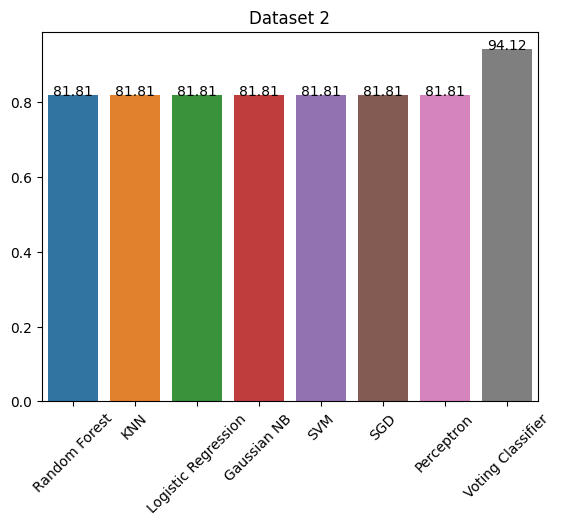

In [89]:
label = ['Random Forest','KNN','Logistic Regression','Gaussian NB','SVM','SGD','Perceptron','Voting Classifier']
scores = [lr_score,knn_score,nb_score,rf_score,sgd_score,svm_score,percept_score,vc_score]
sns.barplot(x=label,y=scores)
plt.xticks(rotation=45)
for i in range(len(label)):
    plt.text(i,scores[i],round(scores[i]*100,2),horizontalalignment='center')
plt.title('Dataset 2')
plt.savefig('results.png')